## EDA 데이터 분석

In [1]:
import numpy as np
import pandas as pd
from PIL import Image
import os
import torchvision
import torch
import sys
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
image_loc='/opt/ml/input/data/train/images' 
csv_loc='/opt/ml/input/data/train/train.csv' 

In [3]:
df=pd.read_csv(csv_loc)
mask_type = ['incorrect_mask', 'mask1', 'mask2', 'mask3','mask4', 'mask5', 'normal']
mask_type_int={k: v for v, k in enumerate(mask_type)}

In [4]:
def get_img(path,type) -> torch.Tensor:
    files=os.listdir(path)
    files.sort()
    _,extension=os.path.splitext(files[mask_type_int[type]])
    return torchvision.transforms.ToTensor()(Image.open(os.path.join(path, type+extension)))

In [5]:
# returns the size of all the image
def get_dataset_size() -> int:
    total_size=0
    for i in range(len(df)):
        p=df.iloc[i].path
        for t in mask_type:
            img=get_img(os.path.join(image_loc,p),t)
            total_size+=sys.getsizeof(img.storage())
    return total_size

In [6]:
# a function that returns all the image as a list
def get_all_image() -> list:
    images=[]
    for i in range(len(df)):
        p=df.iloc[i].path
        for t in mask_type:
            img=get_img(os.path.join(image_loc,p),t)
            images.append(img)
    return images

In [7]:
df.head()

,id,gender,race,age,path
0,000001,female,Asian,45,000001_female_Asian_45
1,000002,female,Asian,52,000002_female_Asian_52
2,000004,male,Asian,54,000004_male_Asian_54
3,000005,female,Asian,58,000005_female_Asian_58
4,000006,female,Asian,59,000006_female_Asian_59


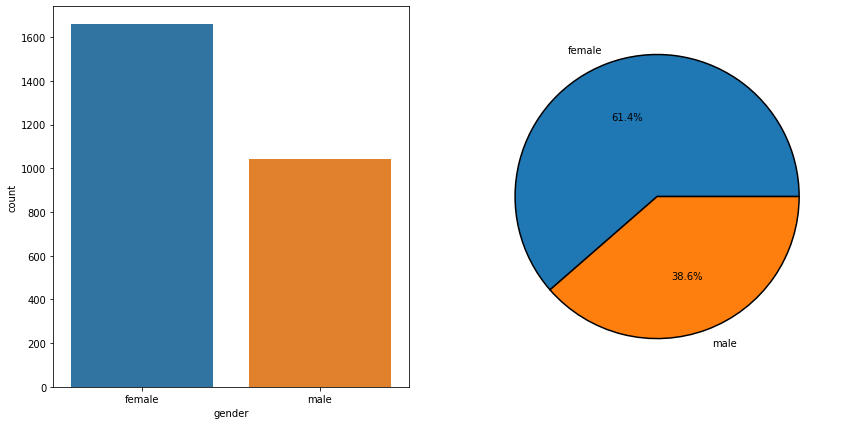

In [8]:
# distribution of gender in the dataset
fig, axes = plt.subplots(1,2, figsize=(14, 7))
sns.countplot(df,x="gender",ax=axes[0])
wedgeprops = {
    'edgecolor': 'black',
    'linestyle': '-',
    'linewidth': 1.5
}
axes[1].pie(df["gender"].value_counts(),labels=df["gender"].unique() ,autopct='%.1f%%',wedgeprops=wedgeprops)
plt.show()

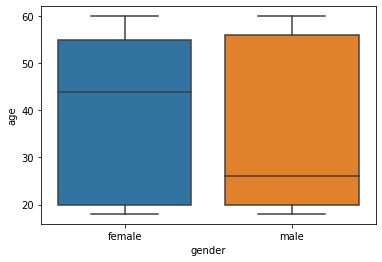

In [9]:
sns.boxplot(df,x='gender',y='age')
plt.show()

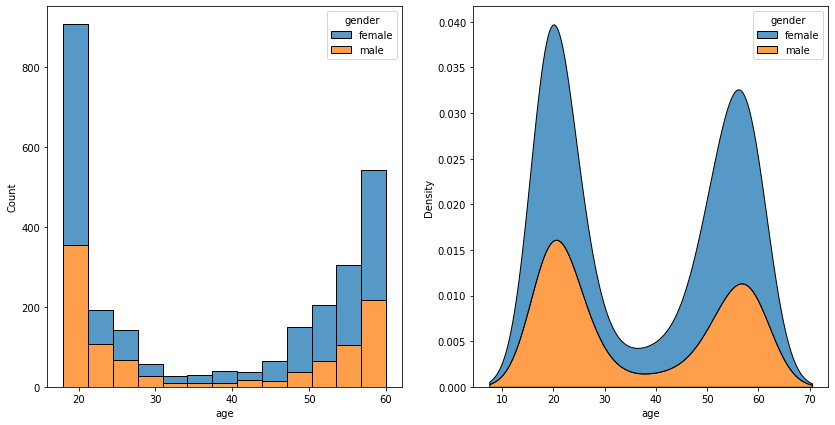

In [10]:
fig, axes = plt.subplots(1,2, figsize=(14, 7))

sns.histplot(df,x="age",hue="gender",multiple="stack",ax=axes[0])
sns.kdeplot(df,x="age",ax=axes[1],hue="gender",fill=True,multiple="stack")
plt.show()

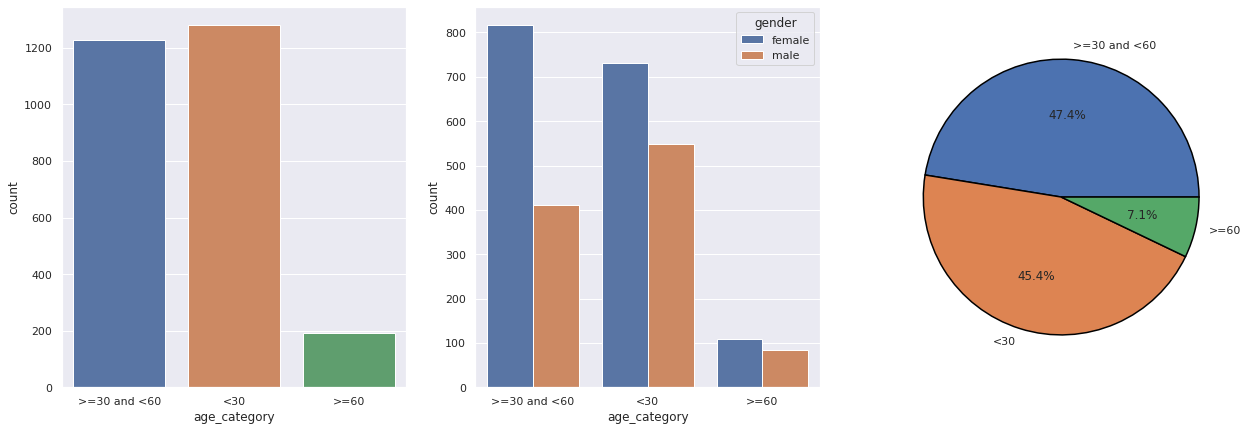

<Figure size 576x432 with 0 Axes>

In [15]:
fig, axes = plt.subplots(1,3, figsize=(21, 7),)
def temp(x):
    if x<30:
        return "<30"
    elif x<60:
        return ">=30 and <60"
    else:
        return ">=60"
plt.figure(facecolor='#FFFFFF')
df["age_category"]=df.age.apply(temp)
sns.set(rc = {'figure.figsize':(8,6)})
sns.countplot(df,x="age_category",ax=axes[0])
sns.countplot(df,x="age_category",hue="gender",ax=axes[1])
axes[2].pie(df["age_category"].value_counts(),labels=df["age_category"].unique() ,autopct='%.1f%%',wedgeprops=wedgeprops)
plt.show()